# Oppgave 4: Skrått Kast

Vi vil lage et program som kan løse ligninger i 1 variabel for oss.
Vi ser eksempelvis på en ligning som oppstår når man vil finne ut hvilken vinkel man må skyte et prosjektil som har fast utgangshastighet med for å treffe en blink.

## Skrått kast

Vi har en kanon som står $7,00$ m over bakken. Kanonen skyter prosjektil med utgangshastighet $15,0$ m/s.
Vi ønsker å treffe en blink som ligger på bakken 28 meter unna. Hvilken utgangsvinkel må vi stille kanonen inn på?

### 2D-kinematikk
Dersom dere har gått forkurset, eller tatt F2 på videregående kjenner dere nok til 
hvordan man regner på bevegelse i 2 dimensjoner. Hvis ikke er ikke detaljene her så farlig - dere vil løse
liknende problemer et par uker inn i fysikken etter jul :)

For et såkalt skrått kast som problemet over beskriver, kan man se på x- og y- posisjonen til prosjektilet
uavhengig av hverandre:
$$
\begin{align}
x(t) &= v_0\cos{\theta}\cdot t \\
y(t) &= v_0\sin{\theta}\cdot t-\frac{1}{2}gt^2
\end{align}
$$
Her er $x(t)$ og $y(t)$ x- og y-posisjonen ved tiden $t$, $v_0$ er den faste utgangsfarten og $g$ er tyngdeakselerasjonen.

Vi vet at på et eller annet tidpunkt $t$, så må prosjektilet treffe blinken - den må innom $(x_b,y_b)= (-7,28)$.
Vi vet ikke når dette skjer (når prosjektilet lander), eller hvilken utgangvinkel vi trenger. Vi får da to ligninger med disse to ukjente:

$$
\begin{align}
x_b &= v_0\cos{\theta}\cdot t \\
y_b &= v_0\sin{\theta}\cdot t-\frac{1}{2}gt^2
\end{align}
$$
Her kan vi for eksempel løse den første ligningen for tiden $t$ og sette dette inn i ligning 2, og vi får etter
litt massasje:
$$
y_b = x_b\tan{\theta}-\frac{1}{2}g\left(\frac{x_b}{v_0\cos{\theta}}\right)^2
$$
Her er
$$
\begin{align}
y_b&= -7,00\ \text{m} \\
v_0 &= 15\ \text{m/s} \\
x_b &= 28,0\ \text{m}
\end{align}
$$
Siste steg er å løse følgende liking for $\theta$
$$
-7 = 28\tan{\theta}-4.905\left(\frac{28}{15\cos{\theta}}\right)^2
$$

Denne likningen er ikke så lett å løse, selv om vi kan leke litt med figuren under og se at den *har* 2 løsninger. Det er ikke så lett å disse løsningene analytisk, men ligningen er en god kandidat til å løses *numerisk*. Andre likninger kan det være *umulig* å finne en analytisk løsning til, feks $x+\sin{x} = 1$



In [2]:
%%html
<iframe src="https://folk.ntnu.no/jonajh/jsx/kast.html" height=800 width=800></iframe> 

## Grafisk løsning

Når man støter på en likning man ikke får helt til å løse, kan man prøve å løse den grafisk. Gitt at ligningen er skrevet om til formen $f(x) = 0$, så vil løsningen(e) være gitt av x-koordinaten til punktet der kurven til $f(x)$ krysser x-aksen. 

For a finne vinkelen vi må stille inn kanonen vår på, blir oppgaven altså å finne roten til funksjonen
$$
f(\theta) =  x_b\tan{\theta}-\frac{1}{2}g\left(\frac{x_b}{v_0\cos{\theta}}\right)^2-y_b
$$

### Oppgave a)
Lag denne funksjonen i python som `def f(thet):`, og plot den i en figur som viser kurven til $f(\theta)$ i intervallet $15^{\circ} \leq \theta \leq 60^{\circ}$.

*PS: Ved riktig utførelse av oppgaven skal kurven se noe [slik](Figurer/oppg4a_lf.png) ut. Husk å ta høyde for konvertering mellom grader og radianer*

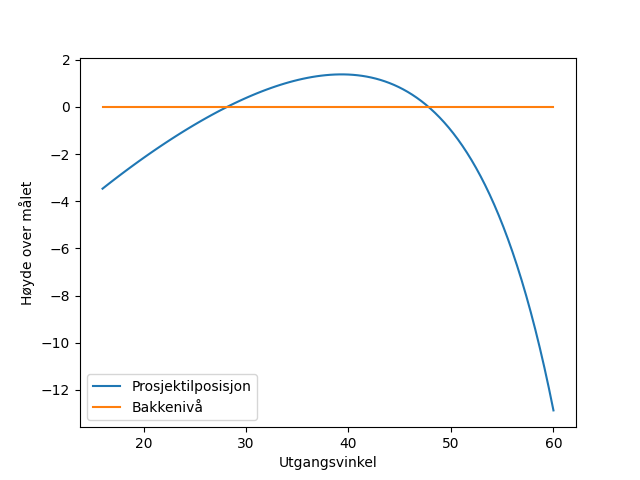

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre
y_bakke = -7  # Høydeforskjell mellom kanonstilling og blink
g = 9.81      # Tyngdekraftskonstant
x_lengde = 28 # Horisontal distanse til blink 
v0 = 15       # Starthastighet


def f(thet):
    #-------------------------------------
    # SKRIV DIN KODE HER:
    #-------------------------------------
    return x_lengde*np.tan(thet) - 0.5*g*(x_lengde/(v0*np.cos(thet)))**2 - y_bakke
    
#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

x = np.linspace(16, 60, 100)
y = f(x*np.pi/180)

%matplotlib ipympl
plt.plot(x, y, label="Prosjektilposisjon")
plt.plot(x, x*0, label="Bakkenivå")
plt.legend()
plt.xlabel("Utgangsvinkel")
plt.ylabel("Høyde over målet")
plt.show()

In [ ]:
# Kodecellen brukes under retting. La så!

Hvor (sånn ca.) vil du si nullpunktene til funksjonen $f(\theta)$ ligger? Fyll inn omtrentlige tallsvar ved å se på grafen (feilmargin $\pm 5^{\circ}$).

In [28]:
theta_1 = 28
theta_2 = 47

In [29]:
print(f"Jeg har funnet ett nullpunkt i nærheten av {theta_1} grader, og et annet nullpunkt i nærheten av {theta_2} grader.")

Jeg har funnet ett nullpunkt i nærheten av 28 grader, og et annet nullpunkt i nærheten av 47 grader.


## Newton's metode.

Vi skal nå bruke Newton's metdoe til å finne ligningens løsninger med større nøyaktighet.

I Newton's metode bruker vi den deriverte til å finne en tilnærming til hvor nullpunktet til funksjonen er. Funksjonen vi skal finne nullpunktene til er: Iddeen er at man kan følge funksjonens tangent til den passerer $0$. 
Dersom man bruker reglende for derivasjon kan man finne at funksjonen
$$
F(\theta) =   x_b\tan{\theta}-\frac{1}{2}g\left(\frac{x_b}{v_0\cos{\theta}}\right)^2 - y_b
$$

har en derivert gitt ved:

$$
F'(\theta) =\frac{x_b}{\cos^2{\theta}}-g\sin(\theta) \left( \frac{x_b}{v_0} \right)^2 \cos^{-3}(\theta) 
$$




For å beregne tangenten til funksjonen trenger vi den deriverte 


Nedenfor ser vi hvordan dette fungerer for en iterasjon.

### Oppgave b)

Vi har nå undersøkt kurven til figuren, og vet sånn ca. hvor løsningene må være. Bruk Newtons metode for å regne ut mer presise løsninger for ligningen $F(\theta) = 0$. Du må her bruke to ulike startverdier, som vil konvergere mot hvert sitt nullpunkt. Pass på å lagre resultatet til variablene `theta_1` og `theta_2`. Løsningen skal oppgis i grader med to desimalers nøyaktighet.

*Tips: Bruk kurven fra deloppgave a til å kontrollere løsningen*

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# Parametre
y_bakke = -7  # Høydeforskjell mellom kanonstilling og blink
g = 9.81      # Tyngdekraftskonstant
x_lengde = 28 # Horisontal distanse til blink 
v0 = 15       # Starthastighet

# Funksjonen f(theta) fra oppgave a)
def f(thet):
    #-------------------------------------
    # SKRIV DIN KODE HER:
    #-------------------------------------
    return x_lengde*np.tan(thet) - 0.5*g*(x_lengde/(v0*np.cos(thet)))**2 - y_bakke
    
# Den deriverte til funksjonen f(theta)
def df(theta):
    #-------------------------------------
    # SKRIV DIN KODE HER:
    #-------------------------------------
    return (x_lengde/np.cos(theta)**2) - g*np.sin(theta)*(x_lengde/v0)**2*np.cos(theta)**-3

# Bruk funksjoene f(theta) og df(theta) til å utføre newtons metode for to startpunkt
#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

def newtons_method(x0, f, df, max_it, tol=1e-4):
    x = x0

    i = 0
    while abs(f(x)) > tol:
        x = x - f(x)/df(x)

        i += 1
        if i >= max_it:
            print(f"f(x) did not converge after {i} iterations")
            print(f"final result:")
            print(f"f({round(x, 4)}) =", round(f(x), 4))
            return x
    
    print("--------------")
    print(f"f(x) converged after {i} iterations")
    print(f"f({round(x, 4)}) =", round(f(x), 4))
    return x

print("theta 1:")
theta_1 = newtons_method(30, f, df, 100)

print("\ntheta 2:")
theta_2 = newtons_method(50, f, df, 100)

theta 1:
--------------
f(x) converged after 9 iterations
f(31.9074) = -0.0

theta 2:
--------------
f(x) converged after 5 iterations
f(50.757) = -0.0


Kjør kodecellen nedenfor for å skrive ut løsningene:

In [33]:
print(f"Vi treffer blink dersom utgangsvinkelen er {theta_1} grader eller {theta_2} grader.")

Vi treffer blink dersom utgangsvinkelen er 31.90742820618898 grader eller 50.75698702141451 grader.
